In [2]:
import numpy as np
from l5kit.data import LocalDataManager, ChunkedDataset
from l5kit.configs import load_config_data
from l5kit.rasterization import build_rasterizer
import matplotlib.pyplot as plt


In [3]:
path = 'expert_buffer/expert_replay_approx_channel7_im112_sample'
ex = np.load(path+'.npy', allow_pickle=True)

path = 'expert_buffer/online_sample'
ex2 = np.load(path+'.npy', allow_pickle=True)

os.environ["L5KIT_DATA_FOLDER"] = "."
dm = LocalDataManager(None)
# get config
cfg = load_config_data("./config.yaml")
rasterizer = build_rasterizer(cfg, dm)

In [20]:
# for i in range(100):
#     print(ex[i][2], ex2[i][2]) 

In [4]:
al = []
sl = []
for idx in range(ex.shape[0]):
    al.append(ex[idx, 2][0])
    sl.append(ex[idx, 2][1])
accel_bin = plt.hist(al, bins=9)[1]
accel_action_space = accel_bin[1:]*.5 + accel_bin[:-1]*.5
steer_bin = plt.hist(sl, bins=27)[1]
steer_action_space = steer_bin[1:]*.5 + steer_bin[:-1]*.5
# print (accel_action_space, steer_action_space)

In [5]:
for idx in range(ex.shape[0]):
    accel = ex[idx, 2][0]
    steer = ex[idx, 2][1]                                                                              
    print(accel, steer)
    break

0.03658023577183478 0.0019229533719156144


In [ ]:
def approx_to_action_space(self, ex_action:Tuple):
        pass

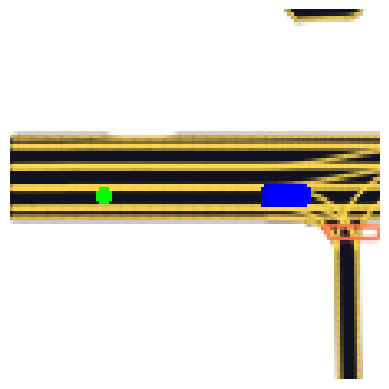

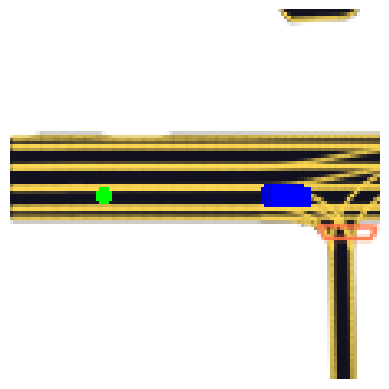

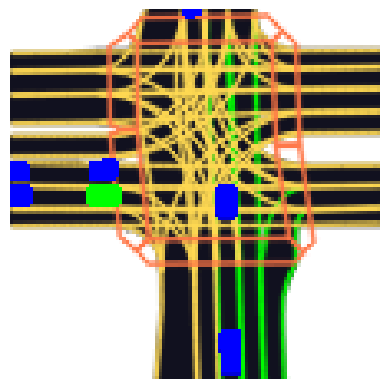

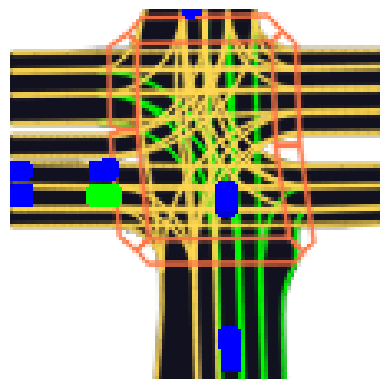

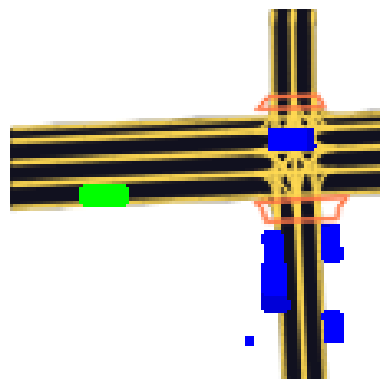

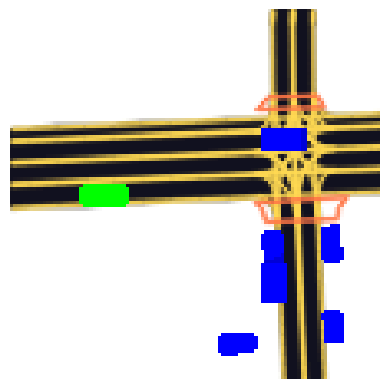

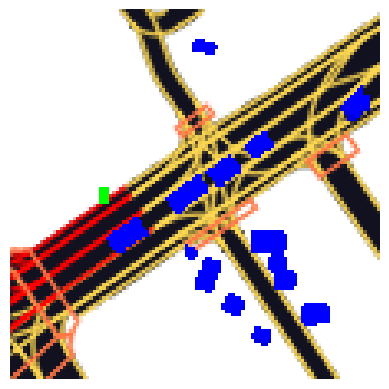

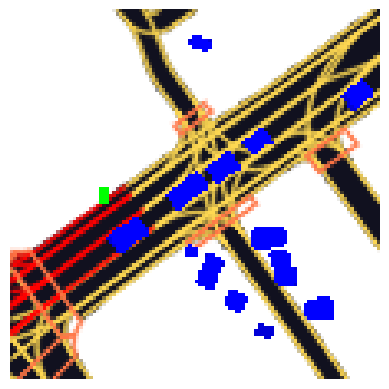

In [7]:
for idx in range(0, ex.shape[0], ex.shape[0] // 3):
    data = ex[idx]
    im1 = rasterizer.to_rgb(data[0].transpose(1, 2, 0))
    im2 = rasterizer.to_rgb(data[1].transpose(1, 2, 0))
    
    plt.imshow(im1)
    plt.axis('off')
    plt.show()
    plt.close()
    
    plt.imshow(im2)
    plt.axis('off')
    plt.show()
    plt.close()
    
    # plt.imshow(data[0][3])
    # plt.axis('off')
    # plt.show()
    # plt.close()
    
    
    
    

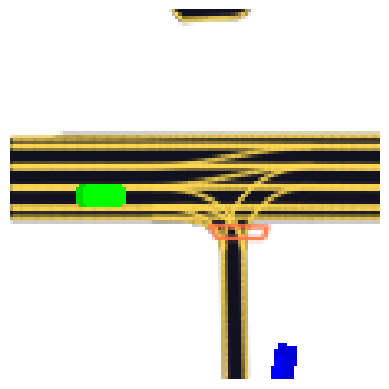

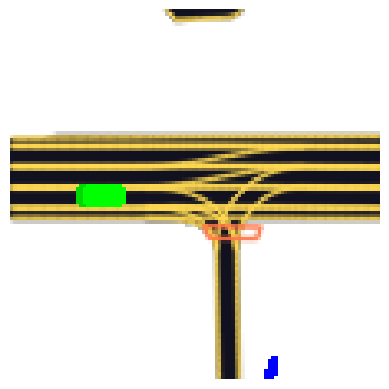

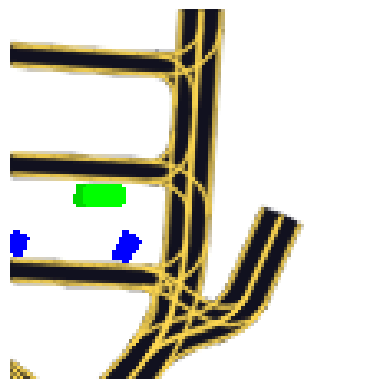

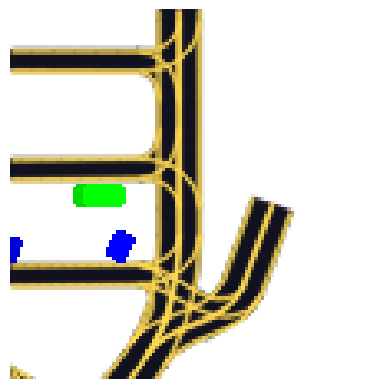

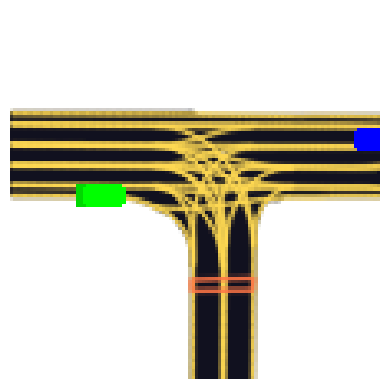

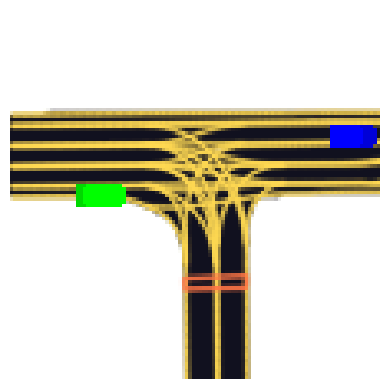

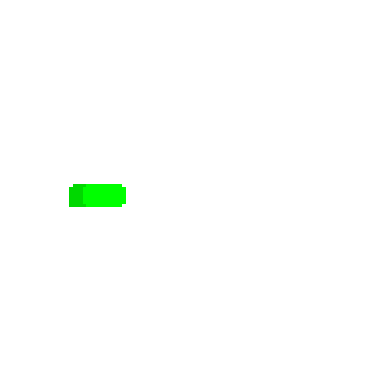

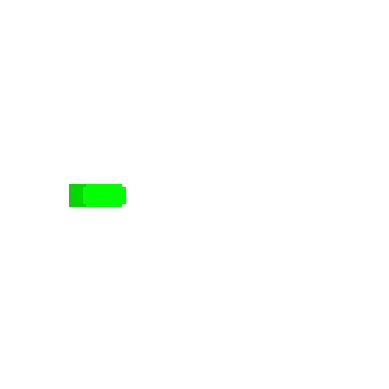

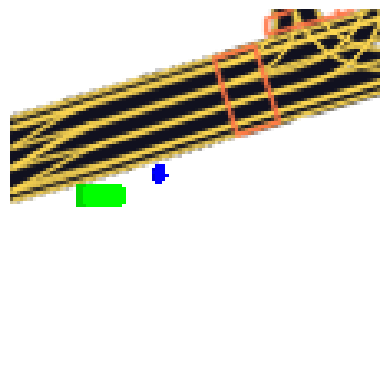

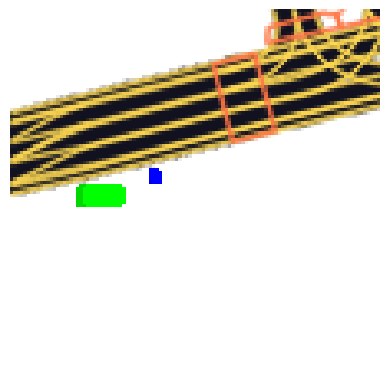

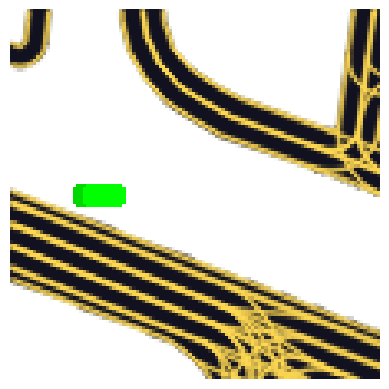

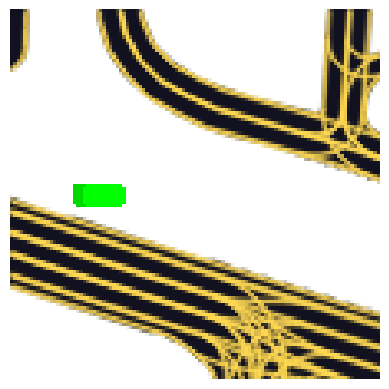

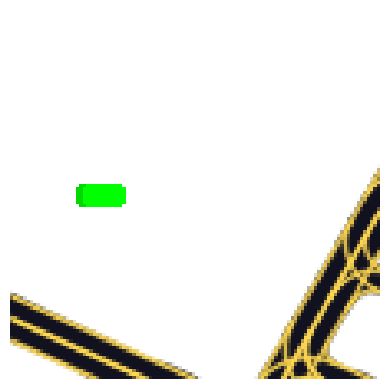

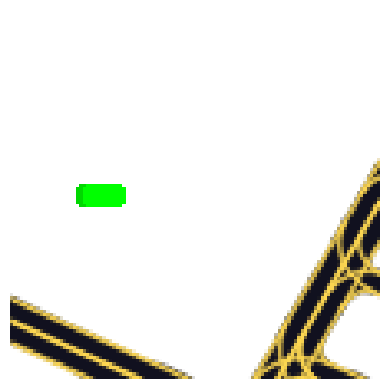

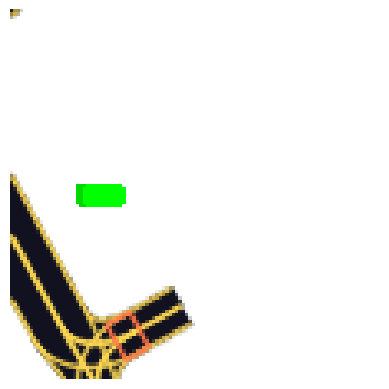

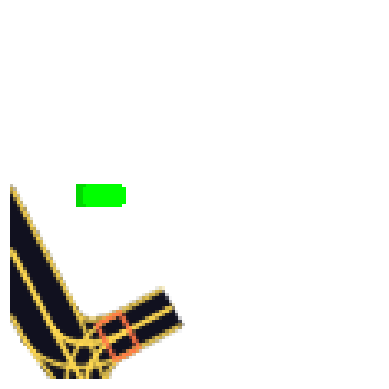

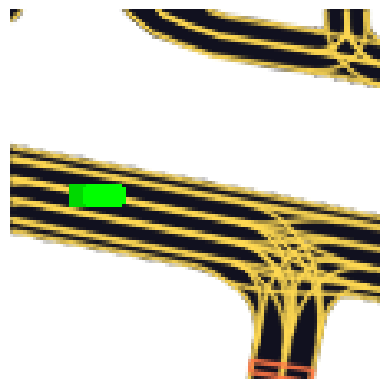

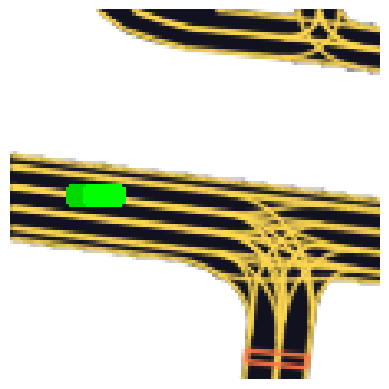

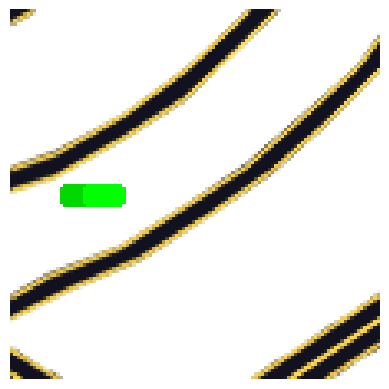

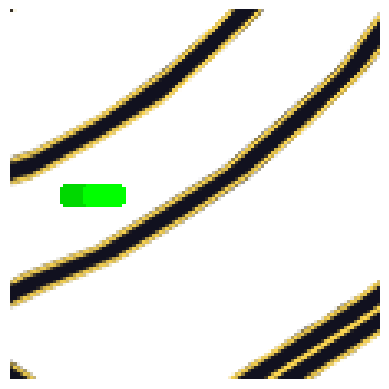

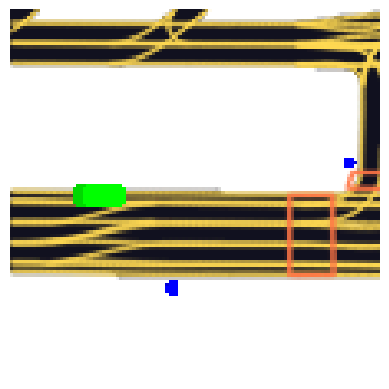

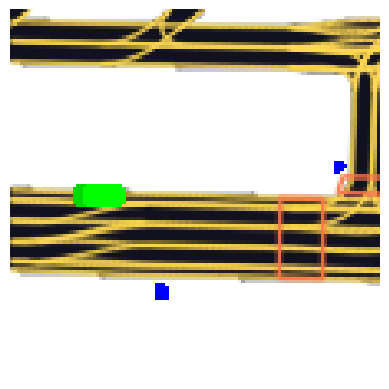

In [5]:
for idx in range(0, ex2.shape[0], ex2.shape[0] // 10):
    data = ex2[idx]
    im1 = rasterizer.to_rgb(data[0].transpose(1, 2, 0))
    im2 = rasterizer.to_rgb(data[1].transpose(1, 2, 0))
    plt.imshow(im1)
    plt.axis('off')
    plt.show()
    plt.close()
    
    plt.imshow(im2)
    plt.axis('off')
    plt.show()
    plt.close()
    
    # plt.imshow(data[0][2] - data[0][3])
    # plt.axis('off')
    # plt.show()
    # plt.close()
    
    # x = (data[0][2] - data[0][3])
    # print(x.shape)
    # print(x[np.nonzero(x)])
    